In [1]:
import os
os.chdir('C:\\Users\\97252\\Documents\\year_4\\sadna\\network-analysis')

from consts import FOLDER2FLOW_RESULTS
import pandas as pd
import pprint
import matplotlib.pyplot as plt



In [2]:
class df_extra:    
    def __init__(self, df):
        self.df = df
        self.num_rows = df.shape[0]
        self.data_dict = {}

    def add_data_to_df(self, col_name, data):
        self.data_dict[col_name] = [data]*self.num_rows
        self.df[col_name] = data


In [3]:
date_folder = "17-05-2022--08-56-52"
res_dp = os.path.join(FOLDER2FLOW_RESULTS, date_folder)

dfs_list = []
for network in sorted(os.listdir(res_dp), reverse=True):
    df_fp = os.path.join(res_dp, network, "results.df")
    if network.endswith(".log") or not os.path.exists(df_fp):
        continue
    print(network)
    df = pd.read_pickle(df_fp)
    
    _df_extra = df_extra(df)
    _df_extra.add_data_to_df("network", network)
    _df_extra.add_data_to_df("mu", network.split("_")[1])
    
    dfs_list.append(df)
    # add columns to df: network, mu
    
    

1000_0.6_9
1000_0.6_8
1000_0.6_7
1000_0.6_6
1000_0.6_5
1000_0.6_4
1000_0.6_3
1000_0.6_2
1000_0.6_1
1000_0.6_0
1000_0.5_9


In [4]:
df = pd.concat(dfs_list)
df.reset_index(inplace=True)
df.pop("index")
df

,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,time-sec,network,mu
0,Neumann,0.363148,0.318980,0.148809,0.449291,0.840,0.501996,30,8,NaN,NaN,0.723629,1000_0.6_9,0.6
1,Louvain,0.363148,0.357063,0.485499,0.413869,0.965,0.804683,30,20,NaN,NaN,0.316704,1000_0.6_9,0.6
2,Neumann-ILP-100-TimeLimit-600,0.363148,0.321114,0.154460,0.440208,0.815,0.503453,30,9,1.0,5.0,25.057334,1000_0.6_9,0.6
3,Neumann-ILP-150-TimeLimit-600,0.363148,0.318789,0.146095,0.453807,0.843,0.490158,30,8,1.0,2.0,430.185013,1000_0.6_9,0.6
4,Neumann-ILP-200-TimeLimit-600,0.363148,0.321455,0.158122,0.464605,0.861,0.472228,30,7,0.0,0.0,702.215152,1000_0.6_9,0.6
5,Neumann,0.362887,0.330834,0.250700,0.391986,0.850,0.628689,28,14,NaN,NaN,0.760308,1000_0.6_8,0.6
6,Louvain,0.362887,0.360312,0.627344,0.410712,0.974,0.875522,28,20,NaN,NaN,0.197312,1000_0.6_8,0.6
7,Neumann-ILP-100-TimeLimit-600,0.362887,0.324851,0.195495,0.411300,0.832,0.593943,28,12,2.0,3.0,60.922069,1000_0.6_8,0.6
8,Neumann-ILP-150-TimeLimit-600,0.362887,0.327384,0.209303,0.423171,0.839,0.584357,28,11,2.0,2.0,507.669213,1000_0.6_8,0.6
9,Neumann-ILP-200-TimeLimit-600,0.362887,0.320671,0.159396,0.465054,0.831,0.473677,28,7,0.0,1.0,3036.796766,1000_0.6_8,0.6


In [9]:
evals = ["avg_modularity", "std_modularity", "avg_jaccard", "std_jaccard"]
mus = ["all", "0.4", "0.5", "0.6"]
evals_dict = {}

for mu in mus:
    evals_dict[mu] = {}
    for _eval in evals:
        evals_dict[mu][_eval] = {}
        
for algo in df.algo.unique():
    for mu, evals in evals_dict.items():
        if mu == "all":
            algo_rows = df.loc[df["algo"]==algo]
        else:
            algo_rows = df.loc[df["algo"]==algo].loc[df["mu"]==mu]
            
        avg_modularity = algo_rows["modularity - algo"].mean()
        std_modularity = algo_rows["modularity - algo"].std()
        avg_jaccard = algo_rows["jaccard"].mean()
        std_jaccard = algo_rows["jaccard"].std()

        if algo.startswith("Neumann-ILP"):
            algo = algo.split("-")[1] + algo.split("-")[2]
            algo = algo.replace("ILP", "NLP")

        evals["avg_modularity"][algo] = avg_modularity
        evals["std_modularity"][algo] = std_modularity
        evals["avg_jaccard"][algo] = avg_jaccard
        evals["std_jaccard"][algo] = std_jaccard
    
#     algos_results[algo] = {"avg_modularity": avg_modularity, "std_modularity": std_modularity, 
#                            "avg_jaccard": avg_jaccard, "std_jaccard": std_jaccard}
pprint.pprint(evals_dict)
    


{'0.4': {'avg_jaccard': {'Louvain': nan,
                         'NLP100': nan,
                         'NLP150': nan,
                         'NLP200': nan,
                         'Neumann': nan},
         'avg_modularity': {'Louvain': nan,
                            'NLP100': nan,
                            'NLP150': nan,
                            'NLP200': nan,
                            'Neumann': nan},
         'std_jaccard': {'Louvain': nan,
                         'NLP100': nan,
                         'NLP150': nan,
                         'NLP200': nan,
                         'Neumann': nan},
         'std_modularity': {'Louvain': nan,
                            'NLP100': nan,
                            'NLP150': nan,
                            'NLP200': nan,
                            'Neumann': nan}},
 '0.5': {'avg_jaccard': {'Louvain': 0.8181458395171664,
                         'NLP100': nan,
                         'NLP150': nan,
                     

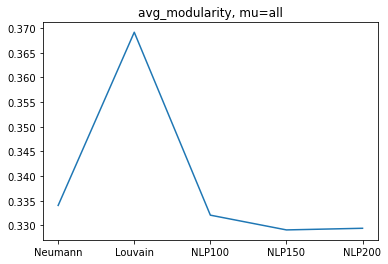

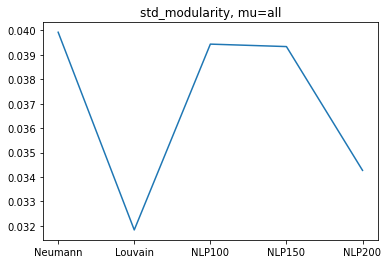

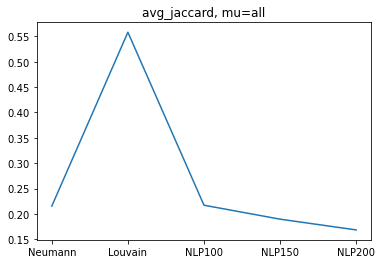

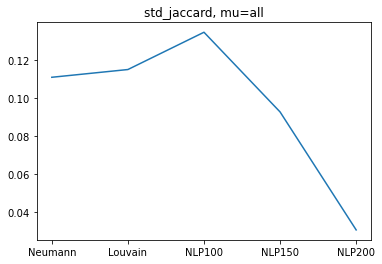

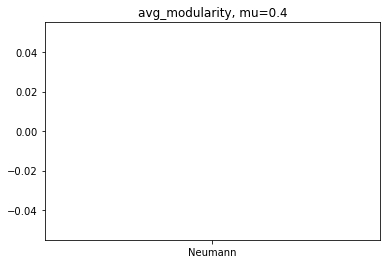

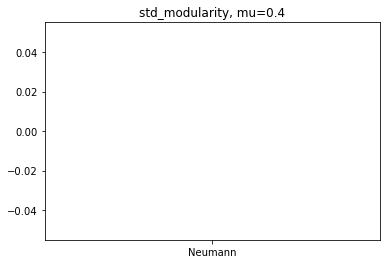

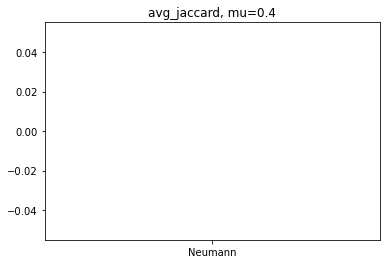

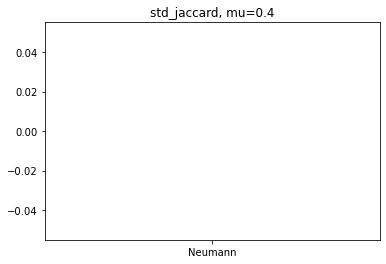

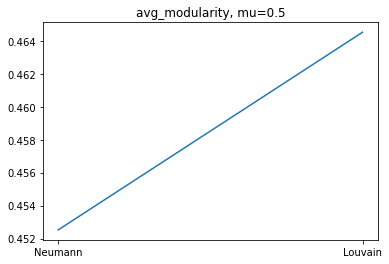

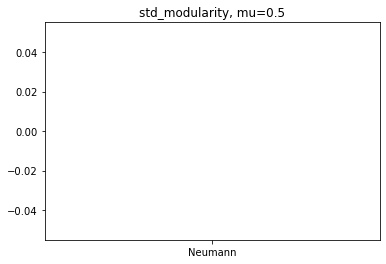

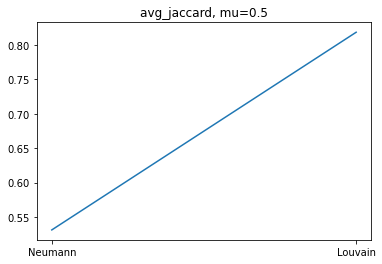

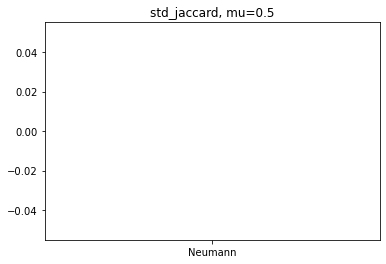

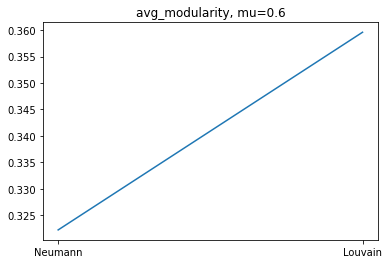

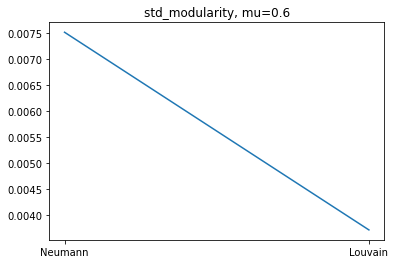

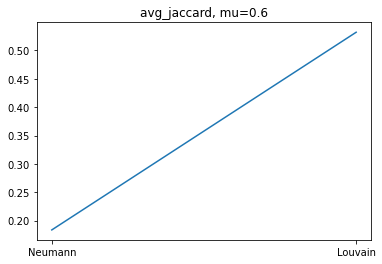

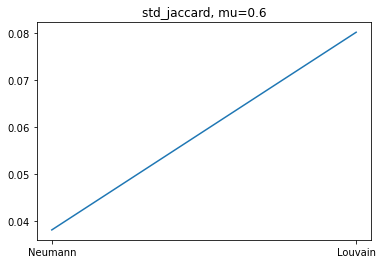

In [11]:
for mu, mu_evals in evals_dict.items():
    for eval_name, eval_data in mu_evals.items():
        fig, ax = plt.subplots()
        ax.set_title(f'{eval_name}, mu={mu}')
        x = eval_data.values()
        y = eval_data.keys()
        ax.plot(y, x)